In [1]:
%pylab inline
from uncertainties import ufloat
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from lmfit import Model
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from lmfit import Minimizer
from lmfit import Parameters, fit_report, minimize, Parameter
import os
from scipy.interpolate import InterpolatedUnivariateSpline
import shutil


Populating the interactive namespace from numpy and matplotlib


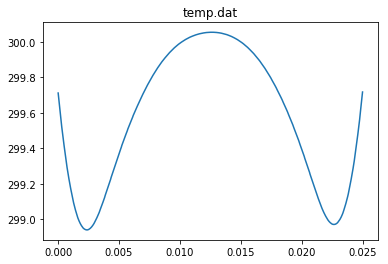

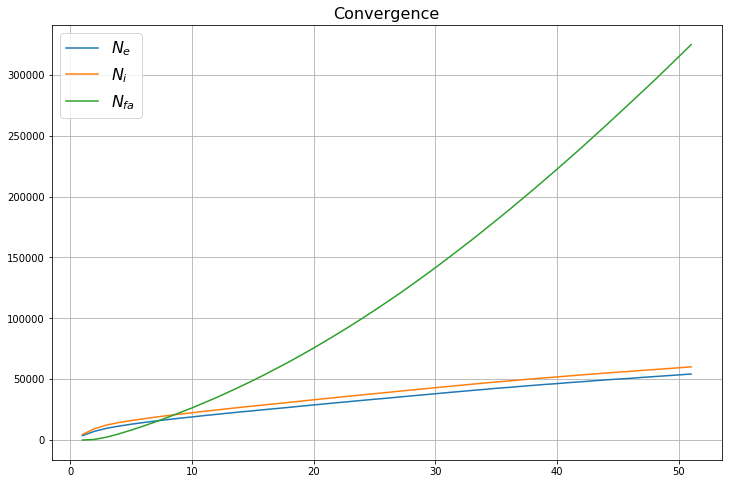

In [6]:
mode = 0
tosave = False
saveloc = "./10.19/"

if mode==0:
    link = "http://plasma.szfki.hu/~guma/PICit/"
    #link = "http://plasma.szfki.hu/~guma/no_temp/previous_runs/10.12./20/outputs/15/"
    if os.path.exists("./plasma.szfki.hu"): shutil.rmtree("./plasma.szfki.hu")
elif mode==1:
    link = "./eduPIC-main/C/no_temp/"
'''
fn = "nArgon_fast_atom_xt.dat"
nfa = loadtxt(link+fn)
matshow(nfa)
title(fn)

fn = "nArgon_ion_xt.dat"
nai = loadtxt(link+fn)
matshow(nai)
title(fn)

fn = "nelectron_xt.dat"
ne = loadtxt(link+fn)
matshow(ne)
title(fn)
'''
fn = "temp.dat"
temp = loadtxt(link+fn)
plot(temp[:,0],temp[:,1])
title(fn)

conv = loadtxt(link+"conv.dat")
figure(figsize=(12,8))
plot(conv[:,0], conv[:,1], label= r"$N_e$")
plot(conv[:,0], conv[:,2], label= r"$N_i$")
plot(conv[:,0], conv[:,3], label= r"$N_{fa}$")
title("Convergence", fontsize=16)
if (tosave): savefig(saveloc+"conv.png")
legend(fontsize=16)
grid()

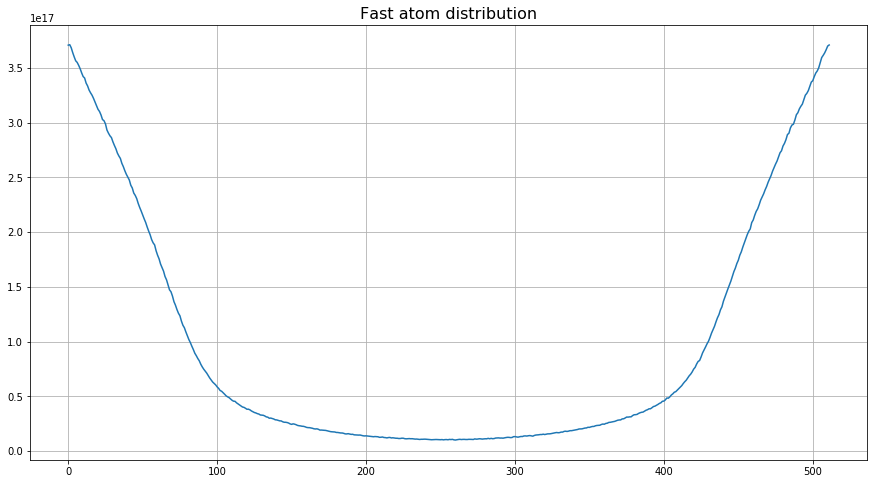

In [14]:
figure(figsize=(15,8))
plot(nfa[:,-1])
title("Fast atom distribution", fontsize=16)
grid()


## Temperature convergence

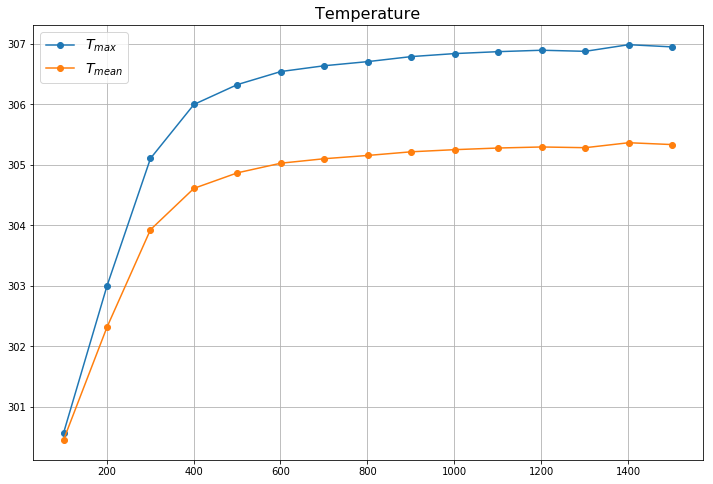

In [13]:
temp = []
max = 16
for i in range(1,max):
    link = "http://plasma.szfki.hu/~guma/edupic/outputs/"+str(int(i))+"/temp.dat"
    if os.path.exists("./plasma.szfki.hu"): shutil.rmtree("./plasma.szfki.hu")
    temp.append(loadtxt(link))

temp=array(temp)
#figure(figsize=(12,8))
#colors = range(1,max)
labels = range(101,max*100+1,100)

#for t, c, l in zip(temp[:,:,1], colors, labels):
#    plot(temp[0,:,0], t, label=l, c="C"+str(c))
#legend(fontsize=14)
#grid()

figure(figsize=(12,8))
title("Temperature", fontsize=16)
plot(labels,temp[:,:,1].max(axis=1),"o-",label=r"$T_{max}$")
plot(labels,temp[:,:,1].mean(axis=1),"o-",label=r"$T_{mean}$")
legend(fontsize=14)
grid()